# Assignment 1 - Question 5 - Group 41
# SuperMarket Sales Analytics
---
* <font color='Purple'><b>Yogesh Vaishnav</b></font>
* 2020ht66501@wilp.bits-pilani.ac.in
* <font color='green'>M.Tech - Computing Systems & Infrastructure</font>
* <font color='green'>Date of submission: Saturday, 30th April 2022</font>
---

# Prerequisite

#### Install python packages

In [1]:
pip install pandas numpy matplotlib seaborn jupyter_contrib_nbextensions

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# import required libraries

import numpy as np # for linear algebra
import pandas as pd # for data processing like read_csv

import matplotlib.pyplot as plt; # for cool visualizations
import seaborn as sns; # for cool visualizations

# Data Extraction

prerequisite is to keep the CSV file in the same folder as ipynb and read it using Pandas

In [3]:
data = pd.read_csv('./Supermarket_Sales_Dataset.csv')

# Exploratory Data Analysis

displaying number of rows and column 

In [4]:
data.shape

(1000, 16)

Examining the first 10 records

In [5]:
data.head(10)

,Invoice ID,Branch,City,Customer Type,Gender,Product Type,Unit Price,Quantity,Tax,Selling Price,Date,Time,Payment Type,Cost Price,Gross Income,Rating
0,750-67-8428,A,Bangalore,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Debit card,522.83,26.1415,9.1
1,226-31-3081,C,Mysore,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6
2,631-41-3108,A,Bangalore,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4
3,123-19-1176,A,Bangalore,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Debit card,465.76,23.2880,8.4
4,373-73-7910,A,Bangalore,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Debit card,604.17,30.2085,5.3
5,699-14-3026,C,Mysore,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Debit card,597.73,29.8865,4.1
6,355-53-5943,A,Bangalore,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Debit card,413.04,20.6520,5.8
7,315-22-5665,C,Mysore,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Debit card,735.60,36.7800,8.0
8,665-32-9167,A,Bangalore,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,3.6260,7.2
9,692-92-5582,B,Mangalore,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,8.2260,5.9


#### Check the schema of CSV

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer Type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product Type   1000 non-null   object 
 6   Unit Price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax            1000 non-null   float64
 9   Selling Price  1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment Type   1000 non-null   object 
 13  Cost Price     1000 non-null   float64
 14  Gross Income   1000 non-null   float64
 15  Rating         1000 non-null   float64
dtypes: float64(6), int64(1), object(9)
memory usage: 125.1+ KB


There are 16 columns, note that Date and Time columns are "object". We will convert them later.

# Data wrangling

In [7]:
data.isna().sum() #To see the missing values
#check if missing values are present 
#to display boolean values for missing values

Invoice ID       0
Branch           0
City             0
Customer Type    0
Gender           0
Product Type     0
Unit Price       0
Quantity         0
Tax              0
Selling Price    0
Date             0
Time             0
Payment Type     0
Cost Price       0
Gross Income     0
Rating           0
dtype: int64

there are no missing values

In [8]:
data.duplicated().sum() #returns duplicated value

0

there are no duplicate values

<AxesSubplot:>

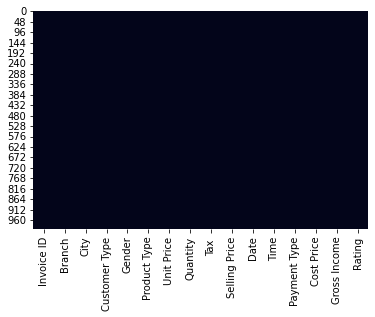

In [9]:
sns.heatmap(data.isnull(), cbar = False) # capturing null values

#### Sales across Branches

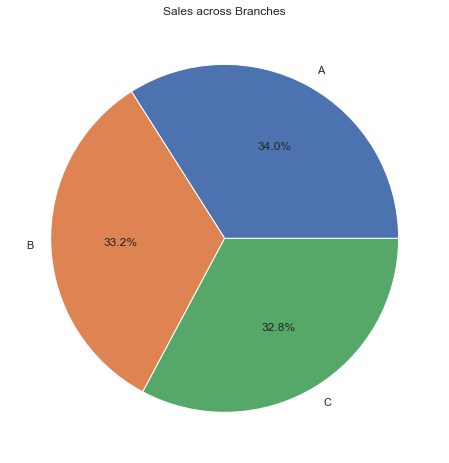

In [10]:
plt.figure(figsize = (12,8))
sns.set_theme(style="darkgrid")
Branch = data.Branch.value_counts().reset_index()
plt.pie(Branch.Branch, labels = Branch['index'],autopct='%1.1f%%')
plt.title("Sales across Branches")
plt.show()


Branch A does most of the sales

#### Sales from different genders

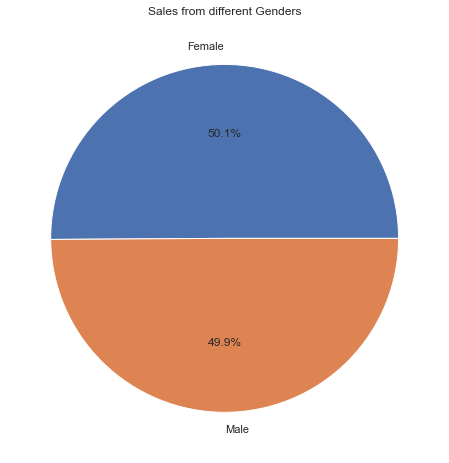

In [11]:
plt.figure(figsize = (12,8))
sns.set_theme(style="darkgrid")
Gender = data.Gender.value_counts().reset_index()
plt.pie(Gender.Gender, labels = Gender['index'],autopct='%1.1f%%')
plt.title("Sales from different Genders")
plt.show()

The ratio of male and female customer is almost same, female is 0.1% higher.

#### Sales by product type

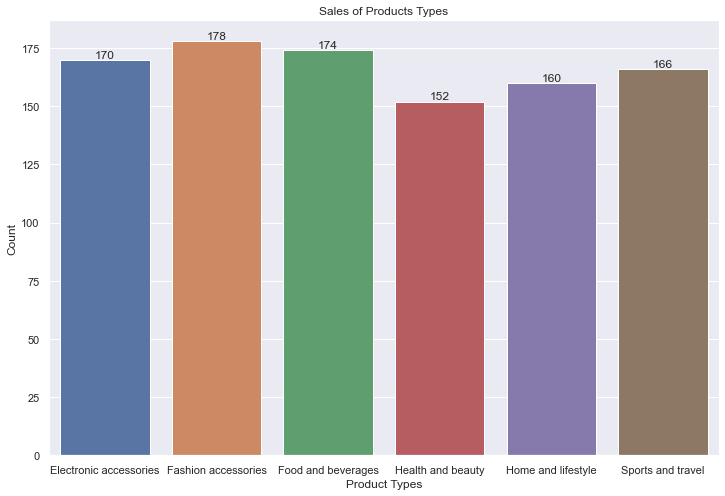

In [12]:
plt.figure(figsize = (12,8))
sns.set_theme(style="darkgrid")

Product = data.groupby('Product Type').size().to_frame(name = "count").reset_index()
ax =sns.barplot(y = 'count', x='Product Type', data = Product )
ax.bar_label(ax.containers[0])
plt.title("Sales of Products Types")
plt.xlabel("Product Types")
plt.ylabel("Count")

plt.show()

Fasion accessories are the most sold product

#### General Histogram

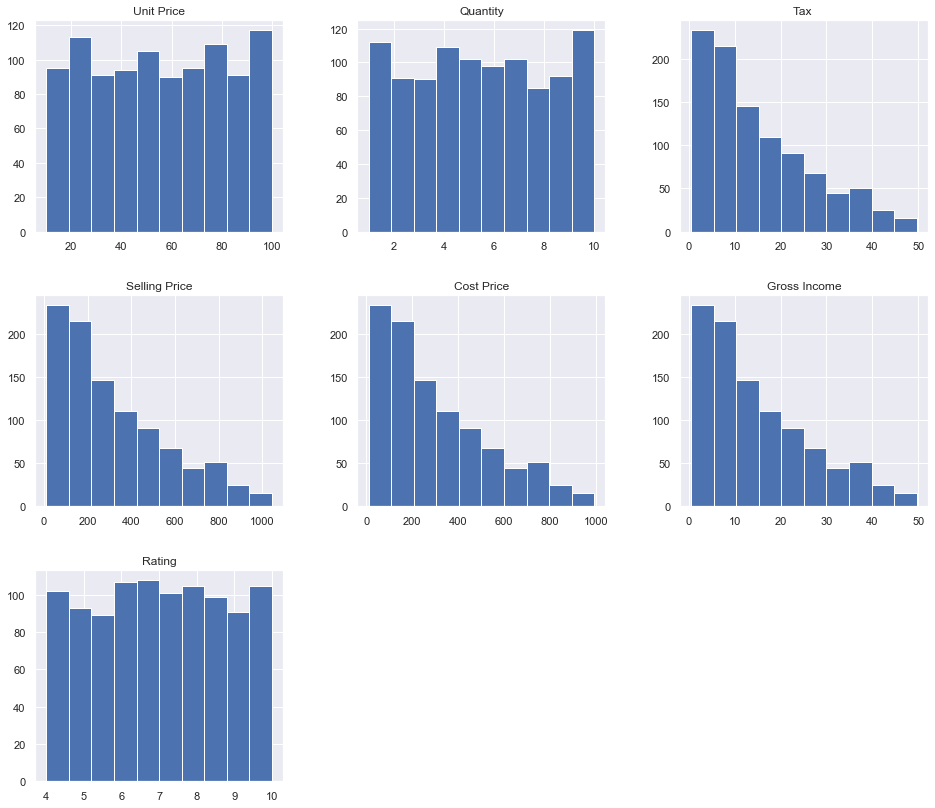

In [13]:
data.hist(figsize=(16,14))
plt.show()

# Objective 1) Which city has a better sale for products in Electronic Accessories product line

Find out in which city EA prodcuts are sold most

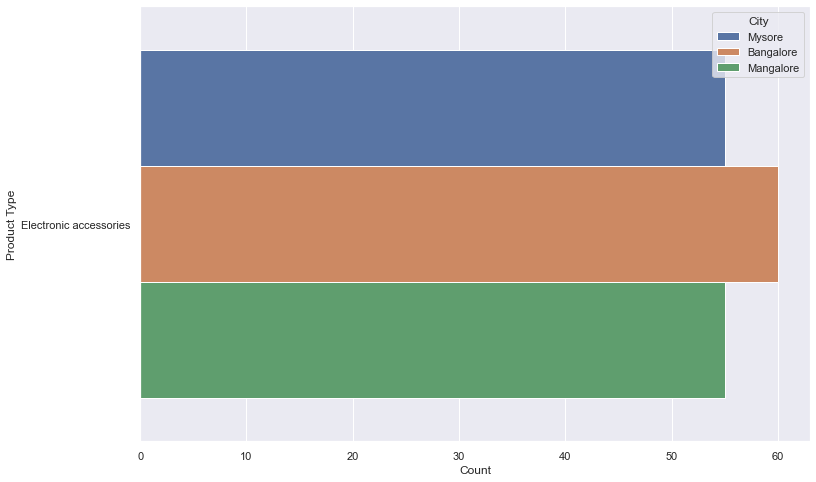

In [14]:
dataframe = data[['Product Type', 'City']]
electronicaccessories = dataframe.loc[(dataframe['Product Type'] == "Electronic accessories")]
plt.figure(figsize = (12,8))
sns.set_theme(style="darkgrid")
sns.countplot(y ='Product Type', hue = "City", data = electronicaccessories) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

The plot shows that, Electornic accessories products are highest sold at Bangalore city

# Objective 2) Which payment method is used more often at a particular city, branch and for which product type

### Branch

Find out which payment method is popular at each <b>Branch</b>

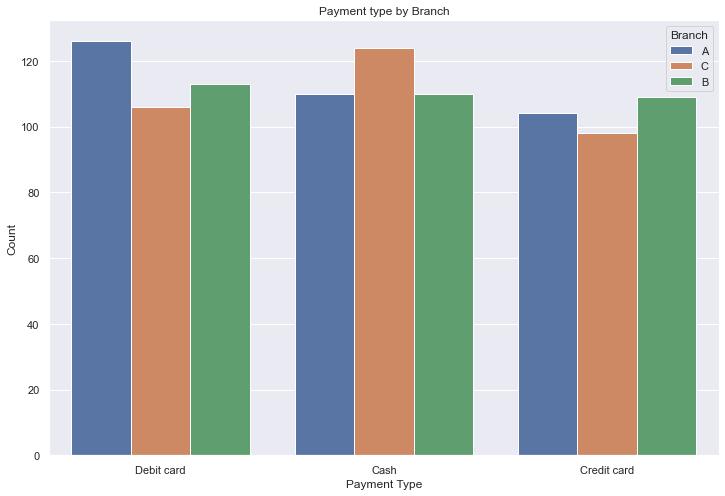

In [15]:
plt.figure(figsize = (12,8))
sns.set_theme(style="darkgrid")
sns.countplot(x ='Payment Type', hue = "Branch", data = data).set_title("Payment type by Branch")
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

The plot shows that, the most popular payment method at each branch is:-
* Branch-A = Debit card
* Branch-B = Cash
* Branch-C = Debit card

Some inferences: People in Branch-B prefer cash payment over card payments

### City

Find out which payment method is popular at each <b>City</b>

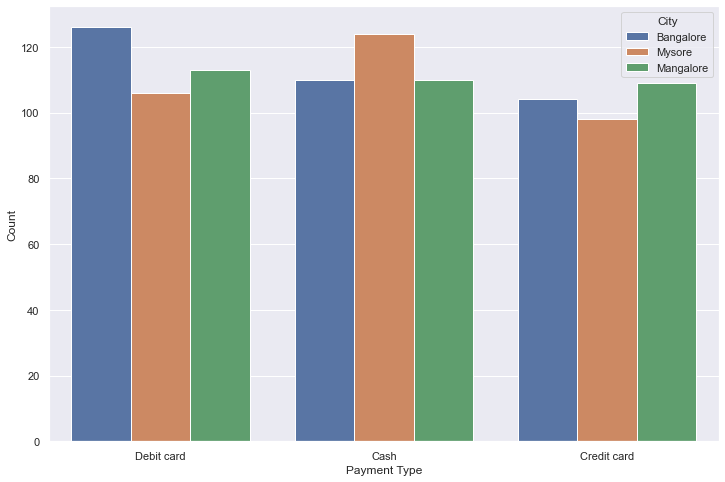

In [16]:
plt.figure(figsize = (12,8))
sns.set_theme(style="darkgrid")
sns.countplot(x ='Payment Type', hue = "City", data = data) 
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

The plot shows that, the most popular payment method at each city is:-
* Bangalore = Debit card
* Mysore = Cash
* Mangalore = Debit card

Some inferences: People in Mysore prefer cash payment over card payments

### Product Type

Find out which Payment Type is popular for each <b>Product Type</b>

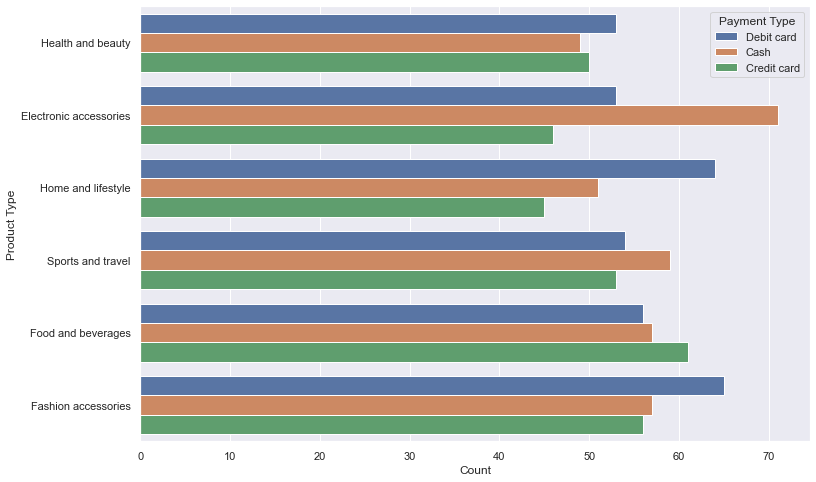

In [17]:
plt.figure(figsize = (12,8))
sns.set_theme(style="darkgrid")
sns.countplot(y ='Product Type', hue = "Payment Type", data = data) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

The plot shows that, the most popular payment method for each product type is:-
* Health & Beauty = Debit card
* Electronic accessories = Cash
* Home and lifestyle = Debit card
* Sports and travel = Cash
* Food and beverages = Credit card
* Fashion accessories = Debit card

Some inferences: People prefer to pay by Credit card for Food and beverages and Cash for Electronics accessories

# Objective 3) Which product type has been more purchased by female customers

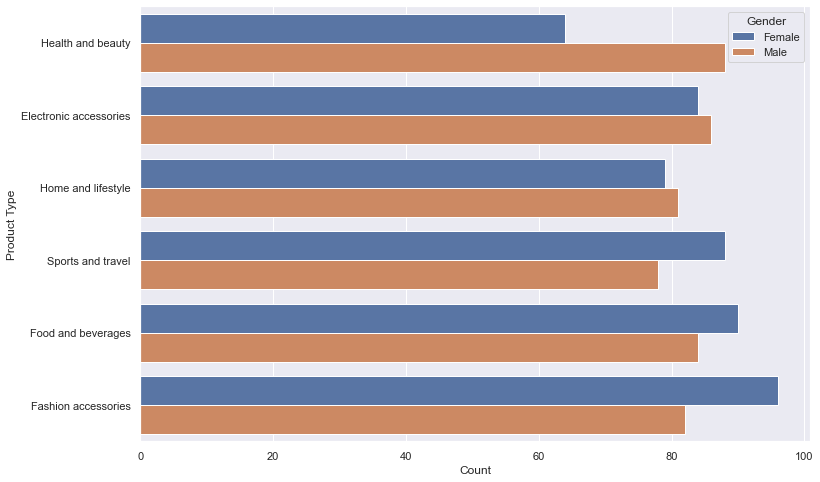

In [18]:
plt.figure(figsize = (12,8))
sns.set_theme(style="darkgrid")
sns.countplot(y ='Product Type', hue = "Gender", data = data) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

The plot shows that:-
* Females are buying fashion accessories products the most
    * followed by food and beverages and sports and travel
* Whereas males are buying health and beatuy products the most
    * followed by electronic accessories

# Objective 4) In which month does the highest number of home and lifestyle products have been sold

### Prerequisite - add date and hour column

We are going to add a new column called 'date' into the existing data schema
The existing "Date" column is of type object. And we are adding a "datetime64" type.
In this section we are going to add total 5 columns - date, day, month, year, hour.

In [19]:
data['date'] = pd.to_datetime(data['Date'])

In [20]:
data['date'].dtype

dtype('<M8[ns]')

In [21]:
type(data['date'])

pandas.core.series.Series

In [22]:
data['date'] = pd.to_datetime(data['date'])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1000 non-null   object        
 1   Branch         1000 non-null   object        
 2   City           1000 non-null   object        
 3   Customer Type  1000 non-null   object        
 4   Gender         1000 non-null   object        
 5   Product Type   1000 non-null   object        
 6   Unit Price     1000 non-null   float64       
 7   Quantity       1000 non-null   int64         
 8   Tax            1000 non-null   float64       
 9   Selling Price  1000 non-null   float64       
 10  Date           1000 non-null   object        
 11  Time           1000 non-null   object        
 12  Payment Type   1000 non-null   object        
 13  Cost Price     1000 non-null   float64       
 14  Gross Income   1000 non-null   float64       
 15  Rating         1000 no

16th column is newly inserted, lets check it out

In [24]:
data.head()

,Invoice ID,Branch,City,Customer Type,Gender,Product Type,Unit Price,Quantity,Tax,Selling Price,Date,Time,Payment Type,Cost Price,Gross Income,Rating,date
0,750-67-8428,A,Bangalore,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Debit card,522.83,26.1415,9.1,2019-01-05
1,226-31-3081,C,Mysore,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6,2019-03-08
2,631-41-3108,A,Bangalore,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4,2019-03-03
3,123-19-1176,A,Bangalore,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Debit card,465.76,23.2880,8.4,2019-01-27
4,373-73-7910,A,Bangalore,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Debit card,604.17,30.2085,5.3,2019-02-08


In [25]:
data['day'] = (data['date']).dt.day
data['month'] = (data['date']).dt.month
data['year'] = (data['date']).dt.year

In [26]:
data.head()

,Invoice ID,Branch,City,Customer Type,Gender,Product Type,Unit Price,Quantity,Tax,Selling Price,Date,Time,Payment Type,Cost Price,Gross Income,Rating,date,day,month,year
0,750-67-8428,A,Bangalore,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Debit card,522.83,26.1415,9.1,2019-01-05,5,1,2019
1,226-31-3081,C,Mysore,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6,2019-03-08,8,3,2019
2,631-41-3108,A,Bangalore,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4,2019-03-03,3,3,2019
3,123-19-1176,A,Bangalore,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Debit card,465.76,23.2880,8.4,2019-01-27,27,1,2019
4,373-73-7910,A,Bangalore,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Debit card,604.17,30.2085,5.3,2019-02-08,8,2,2019


Similarly, let us add "hour" column too

In [27]:
data['Time'] = pd.to_datetime(data['Time'])
data['hour'] = (data['Time']).dt.hour

20th column is newly inserted, lets check it out

In [28]:
data.head()

,Invoice ID,Branch,City,Customer Type,Gender,Product Type,Unit Price,Quantity,Tax,Selling Price,...,Time,Payment Type,Cost Price,Gross Income,Rating,date,day,month,year,hour
0,750-67-8428,A,Bangalore,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2022-05-01 13:08:00,Debit card,522.83,26.1415,9.1,2019-01-05,5,1,2019,13
1,226-31-3081,C,Mysore,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2022-05-01 10:29:00,Cash,76.40,3.8200,9.6,2019-03-08,8,3,2019,10
2,631-41-3108,A,Bangalore,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,2022-05-01 13:23:00,Credit card,324.31,16.2155,7.4,2019-03-03,3,3,2019,13
3,123-19-1176,A,Bangalore,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,2022-05-01 20:33:00,Debit card,465.76,23.2880,8.4,2019-01-27,27,1,2019,20
4,373-73-7910,A,Bangalore,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,2022-05-01 10:37:00,Debit card,604.17,30.2085,5.3,2019-02-08,8,2,2019,10


In [29]:
data['month'].unique()

array([1, 3, 2])

In [30]:
data['hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

### Objective 4
Now that the month and hour data is available, let us plot it

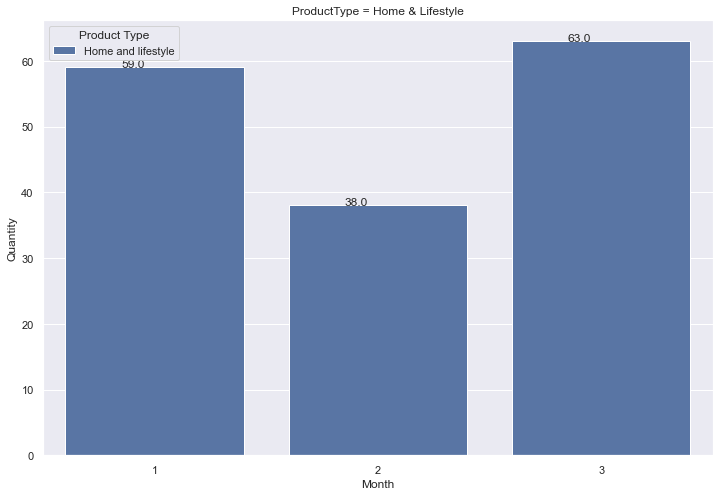

In [31]:
dataframe = data[['Product Type', 'month', 'Quantity']]
monthdata = dataframe.loc[(dataframe['Product Type'] == "Home and lifestyle")]
plt.figure(figsize = (12,8))
ax = sns.countplot(x='month', hue = 'Product Type', data = monthdata)
ax.set_title(label = "ProductType = Home & Lifestyle")
ax.set_xlabel(xlabel = "Month")
ax.set_ylabel(ylabel = "Quantity")
#for displaying value on the top of a bar
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

##### The plot shows that:-
* Quantity of "Home and lifestyle" products sold in the 1st and 3rd month are almost equal
    * however, 3rd month quantity 63 is marginally greater than 1st month quantity 59

# Objective 5) At what time most of the female customers are purchasing products

Since we already added 'hour' in previous step, we can use that column here.

In [32]:
data['hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

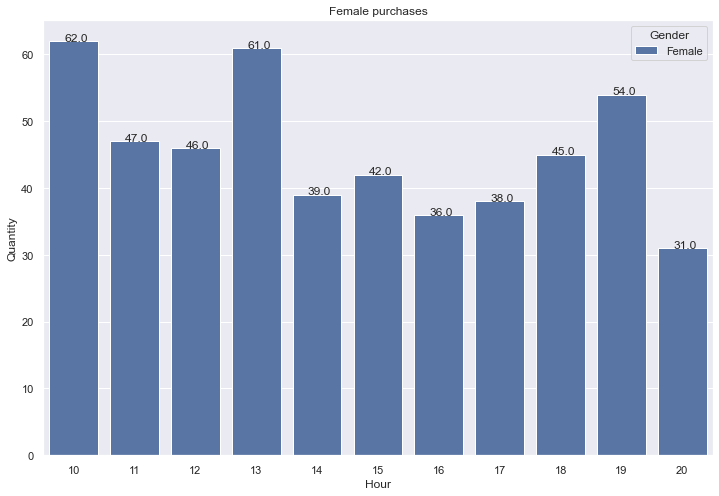

In [33]:
dataframe = data[['Gender', 'hour', 'Quantity']]
hourdata = dataframe.loc[(dataframe['Gender'] == "Female")]
plt.figure(figsize = (12,8))
ax = sns.countplot(x='hour', hue='Gender', data=hourdata)
ax.set_title(label = "Female purchases")
ax.set_xlabel(xlabel = "Hour")
ax.set_ylabel(ylabel = "Quantity")
#for displaying value on the top of a bar
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

The plot shows that:-
* Females mostly show at 10th and 13th hour of a day
    * Sales at 10th hour (62) is marginally higher than 13th hour (61)